<h1>Lab 16:<br>Computing Electric Fields and Potentials</h1>
<h2>Introduction</h2>
In this lab, we will study the electric field generated by a collection of point charges. The magnitude of the electric field from a single point charge is $E(r) = \frac{q}{4 \pi \epsilon_0 r^2}$ and the direction of the field is radially outward if the chage $q$ is positive or radially inward if $q$ is negative. In order to compute the electric field from two point charges we must remember that the electric field is a <b>vector</b>. Therefore, in order to compute the electric field from two (or more) point charges we must break the field from each charge into its $x-$ and $y-$ components (or if we are in three dimensions its $x-$, $y-$ and $z-$ components) and add the fields component by component.

Suppose we have two point charges spaced a distance $d$ apart as shown in the figure below.

In [1]:
#make figure in manim.

We want to calculate the electric field due to these charges at an arbitrary point P. To do this we must decompose the electric fields from the charges $q_1$ and $q_2$ into their $x$ and $y$ components. The geometry is shown below.

In [2]:
#Another figure to make

The electric field from the charge $q_1$ is<br>
$\textbf{E}_1(x,y) = E_{x,1}(x,y) \hat i + E_{y,1}(x,y) \hat j$<br>
Which means we can write:<br>
$E_{x,1} = \cos(\phi) E_1(x,y)$ and $E_{y,1}(x,y) = \sin(\phi) E_1(x,y)$.
<br>
We can rewrite the sine and cosine as:<br>
$\cos(\phi) = \frac{x + d/2}{r_1}$ and $\sin(\phi) = \frac{\gamma}{r_1}$. <br>
Since $E_1 (x,y) = \frac{q_1}{4 \pi \epsilon_0 r_1^2}$, we get <br>
$E_{x,1}(x,y) = q_1 \frac{x+d/2}{4\pi \epsilon_0 r_1^3}$ and <br>
$E_{y,1}(x,y) = q_1 \frac{\gamma}{4 \pi \epsilon_0 r_1^3}$
<br><br>
Likewise:
<br>
$\textbf{E}_2(x,y) = E_{x,2}(x,y) \hat i + E_{y,2}(x,y) \hat j$<br>
Which means we can write:<br>
$E_{x,2} = \cos(\phi) E_2(x,y)$ and $E_{y,2}(x,y) = \sin(\phi) E_2(x,y)$.
<br>
We can rewrite the sine and cosine as:<br>
$\cos(\phi) = \frac{x + d/2}{r_2}$ and $\sin(\phi) = \frac{\gamma}{r_2}$. <br>
Since $E_2 (x,y) = \frac{q_2}{4 \pi \epsilon_0 r_2^2}$, we get <br>
$E_{x,2}(x,y) = q_2 \frac{x+d/2}{4\pi \epsilon_0 r_2^3}$ and <br>
$E_{y,2}(x,y) = q_2 \frac{\gamma}{4 \pi \epsilon_0 r_2^3}$
<br><br>
The total electric field is:<br>
$\textbf{E}_T (x,y) = (E_{x,1}(x,y) + E_{x,2}(x,y))\hat i + (E_{y,1}(x,y) + E_{y,2}(x,y)) \hat j$<br>
which we can write as:<br>
$\textbf{E}_T(x,y) = (q_1 \frac{x+d/2}{4 \pi \epsilon_0 r_1^3} + q_2 \frac{x-d/2}{4 \pi \epsilon_0 r_2^3}) \hat i + (q_1 \frac{\gamma}{4 \pi \epsilon_0 r_1^3} + q_2 \frac{\gamma}{4 \pi \epsilon_0 r_2^3}) \hat j$

We want to write Python code that will do not only this calculation but that will also handle an arbitrary collection of point charges. The first step is to write a function that will compute the distances between a point with coordinates {x,y} and a list points with coordinates {x,1,y1},{x2,y2},....,{xn,yn}. We will need a small symbolic list to test our function on. I have called this list "pointList".

In [3]:
import sympy as sym

x, x1, x2, x3, y, y1, y2, y3, q, z = sym.symbols('x x1 x2 x3 y y1 y2 y3 q z')

pointList = [[x1, y1],[x2, y2], [x3,y3]]
pointList

[[x1, y1], [x2, y2], [x3, y3]]

The distance function will take one argument, a list of points. We can easily write this function in a single line.

In [4]:
def Distance(points):
    return [((x-i)**2 + (y-j)**2)**(1/2) for i,j in points]

Distance(pointList)

[((x - x1)**2 + (y - y1)**2)**0.5,
 ((x - x2)**2 + (y - y2)**2)**0.5,
 ((x - x3)**2 + (y - y3)**2)**0.5]

As you can see, our function works.
<br>
<br>
The next step is to write a function that computes the sine and cosine of the angle between the line that runs from the point {x,y} to the charge and the x axis. This function is called "SinesAndCosines"

In [5]:
def SinesAndCosines(points):
    
    distances = Distance(points)
    
    x_list, y_list = zip(*points)
    
    list_eval = lambda v, li : [(v - i)/distances[k] for k,i in enumerate(li)]
    x_eval = list_eval(x, x_list)
    y_eval = list_eval(y, y_list)

    final = zip(x_eval, y_eval)
    final = [list(i) for i in list(final)]
    
    return list(final)
    

print(SinesAndCosines(pointList))

[[(x - x1)/((x - x1)**2 + (y - y1)**2)**0.5, (y - y1)/((x - x1)**2 + (y - y1)**2)**0.5], [(x - x2)/((x - x2)**2 + (y - y2)**2)**0.5, (y - y2)/((x - x2)**2 + (y - y2)**2)**0.5], [(x - x3)/((x - x3)**2 + (y - y3)**2)**0.5, (y - y3)/((x - x3)**2 + (y - y3)**2)**0.5]]


This function computes the required trig functions and outputs them in the form [Cos[angle], Sin[angle]]. <br>
We can test our function with two charges one at [-d/2,0] and the other at [d/2,0]. This is the case we did by hand in the example above. We had better get the same answer

In [6]:
d, q1, q2 = sym.symbols('d q1 q2')

test_case = [[-d/2, 0],[d/2,0]]

charges= [q1, q2]

result = []
for i,v in enumerate(SinesAndCosines(test_case)):
    for c in SinesAndCosines(test_case)[i]:
        result.append(charges[i] * c)
print(result)

[q1*(d/2 + x)/(y**2 + (d/2 + x)**2)**0.5, q1*y/(y**2 + (d/2 + x)**2)**0.5, q2*(-d/2 + x)/(y**2 + (-d/2 + x)**2)**0.5, q2*y/(y**2 + (-d/2 + x)**2)**0.5]


and we do. We can now write a function which computes the electric field from each point charge. This function is called "Efields". Efields will take a list of the form [[q1,[x1,y1]],[q2,[x2,y2],[q3,[x3,y3]]].

In [7]:
import numpy as np

π, ϵ0 = sym.symbols('π ϵ0')


def Efields(point_list):
    charges = [i[0] for i in point_list]
    points = [i[1] for i in point_list]
    
    result=[]
    for i,v in enumerate(SinesAndCosines(points)):
        for c in SinesAndCosines(points)[i]:
            result.append(charges[i] * c)

    final=[]
    for j,l in enumerate(result):
        d = Distance(points)[j//2]
        final.append(result[j] / (d*d * 4*π*ϵ0))

    
    return final

two_charges = [[q1,[-d/2,0]],[q2,[d/2,0]]]


Efields(two_charges)

[q1*(d/2 + x)/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5),
 q1*y/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5),
 q2*(-d/2 + x)/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5),
 q2*y/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5)]

which is what we got from our hand calculation. The only thing left is to sum the x and y components to get the total electric field. This is done by the function "TotalEfield".
<br>
The x components are given by the even entries of the list, and the y components are given by odd. Try it and see

In [8]:
def TotalField(charges):
    return (sum(Efields(charges)[::2]), sum(Efields(charges)[1::2]))
TotalField(two_charges)

(q1*(d/2 + x)/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5) + q2*(-d/2 + x)/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5),
 q1*y/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5) + q2*y/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5))

This code will compute the electric field from any collection of point charges. In addition, we will want the magnitude of the electric field, which is computed by the function "MagnitudeEfield"

In [9]:
def MagnitudeEfield(charges):
    return sym.sqrt(sum([i**2 for i in TotalField(charges)]))

print(MagnitudeEfield(two_charges))

sqrt((q1*y/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5) + q2*y/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5))**2 + (q1*(d/2 + x)/(4*π*ϵ0*(y**2 + (d/2 + x)**2)**1.5) + q2*(-d/2 + x)/(4*π*ϵ0*(y**2 + (-d/2 + x)**2)**1.5))**2)


We also want to compute the potential due to a collection of point charges. This is an easier calculation since, for potentials, we do not have to worry about vector components.

In [10]:
def Potential(charges):
    charges_only = [i[0] for i in charges]
    points = [i[1] for i in charges]
    distances = Distance(points)

    res=[]
    for i in range(0,len(charges)):
        res.append(charges_only[i]/((4*π*ϵ0)*distances[i]))
    
    return sum(res)

<h2>Representation of Electric Fields and Potentials</h2>
<u><b>Be warned: In this section and in what follows, we are sloppy with units (that is, we ignore them completely). Keep this in mind when comparing this Lab to what you learn in the Lecture part of the course.</b></u><br><br>
Suppose that our two charges have equal but opposite charges. Let the charge on the left have charge $q_1 = r \pi \epsilon+0 $ and the charge on the right have charge $q_2 = 4 \pi \epsilon_0$. The strange units of $\epsilon_0$ get rid of all the factors of $\epsilon_0$ that would otherwise be floating around but will not change the physics. We can set $d=1$.

How will we visualize the electric field? We need to plot both the direction and the magnitude of the field. There is a python function which will plot a vector field. It is in the package matplotlib. The  command we want is quiver. The syntax for quiver is

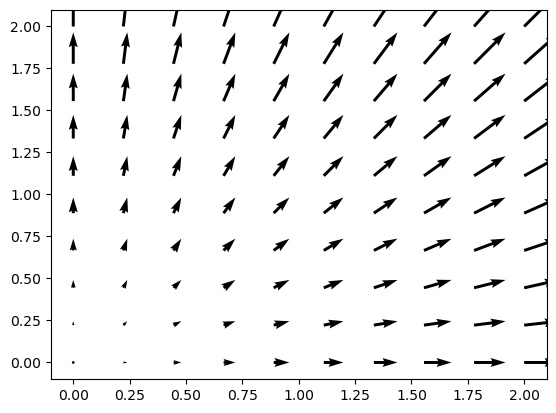

In [11]:
from matplotlib import pyplot as plt

X = np.linspace(0,2,10)
Y = np.linspace(0,2,10)
U, V = np.meshgrid(X,Y)
fig, ax = plt.subplots()
quiv2 = ax.quiver(X, Y, U, V)
plt.show()

Plotting the field from our two charges gives:

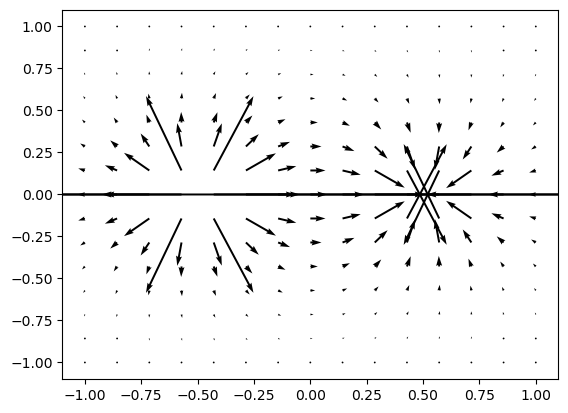

In [12]:
#[i.subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, x: X, y: Y, π:np.pi}) for i in TotalField(two_charges)]
X = np.linspace(-1,1,15)
Y = np.linspace(-1,1,15)

xx, yy = np.meshgrid(X,Y)

(our_x, our_y) = TotalField(two_charges)

x_values = [our_x.subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: i, y: j, ϵ0: 1}) for i in X for j in Y]
y_values = [our_y.subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: i, y: j, ϵ0: 1}) for i in X for j in Y]


x_values = np.asarray(x_values)
y_values = np.asarray(y_values)

#without this, quiver will not be able to plot our vectors
x_values = x_values.astype(float)
y_values = y_values.astype(float)

fig, ax = plt.subplots()
quiv1 = ax.quiver(yy, xx, x_values, y_values)
plt.show()


Not very satisfying! The trouble is taht the electric field from a point charge falls off as $\frac{1}{r^2}$. That's fast! As a result the arrows which point in the direction of the field and have a length that is proportional to the magnitude of the field quickly become too small to see. To fix this, we can normalize each vector by dividing by the magnitude of each vector. We will also plot some points to show the location of the charges.

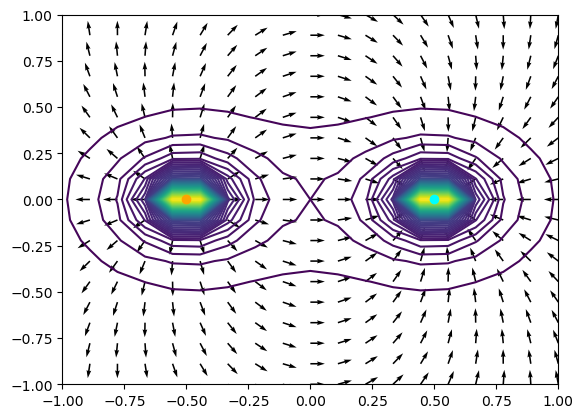

In [13]:
X = np.linspace(-1,1,19)
Y = np.linspace(-1,1,19)

xx, yy = np.meshgrid(X,Y)

(our_x, our_y) = TotalField(two_charges)

x_values = [our_x.subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: i, y: j, ϵ0: 1}) for i in X for j in Y]
y_values = [our_y.subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: i, y: j, ϵ0: 1}) for i in X for j in Y]

x_values = np.asarray(x_values)
y_values = np.asarray(y_values)

mag = [MagnitudeEfield(two_charges).subs({q1: 4*np.pi, q2: -4*np.pi, d: 1, π: np.pi, x: i, y: j, ϵ0: 1}) for i in X for j in Y]

mag = np.asarray(mag)
mag = np.asarray(mag)

x_values = x_values/mag
y_values = y_values/mag

x_values = x_values.astype(float)
y_values = y_values.astype(float)


Z = mag.reshape(len(X),len(Y)).astype(float)
cp = plt.contour(yy, xx, Z, 100)

quiv = plt.quiver(yy, xx, x_values, y_values)
plt.plot(-0.5,0,marker="o",color="Orange")
plt.plot(0.5,0,marker="o",color="Cyan")
plt.show()

The arrows show the direction of the electric field. <u>They are all the same length and have nothing to do with the magnitude of the electric field.</u> The contours are what are called "equipotential lines"; they represent surfaces of constant electric potential.  This lets us say something about the magnitude of the electric field: the closer the contours are, the more rapidly the field is changing. Note that the contour lines do not stop as they do in the figure, you may increase the 4th argument of plt.contour to see more of the lines.

<h2>The Dipole Approximation</h2>

If we are "far away" from the charges we can make use of what is known as the dipole approximation. What does far away mean here? "Far away" means far compared to the separation between the charges, or $|r| \gg d$. We wil look only at the on-axis case where we are on the y-axis (that is, our x-coordinate is zero).<br><br>
Suppose we have two charges with equal but opposite charges and that our charges are separated by a distance d. By symmetry the y component of the electric field is zero. The x component of the electric field is 

In [14]:
onaxis_x, onaxis_y = TotalField(two_charges)

OnAxisField = (onaxis_x.subs({q1: q, q2: -q, x: 0}), onaxis_y.subs({q1: q, q2: -q, x: 0}))
OnAxisField

(d*q/(4*π*ϵ0*(d**2/4 + y**2)**1.5), 0)

Now suppose that $ d \ll y$ and let $z=\frac{d}{y}$. Notice that $z$ is dimensionless and small. This means that we can series expand (using a Taylor series) our expression for small $z$. First we make the substitution.

In [15]:
onaxis_x.subs({q1: q, q2: -q, x: 0, y: d/z})

d*q/(4*π*ϵ0*(d**2/4 + d**2/z**2)**1.5)

Then, after expansion and substituting $z$ for $d/y$, we find:

In [16]:
dipole = (d*q)/(4*π*y**3*ϵ0)

This is the dipole approximation result. Notice that in this approximation the field depends only on the product d q and not on d or q separately; the product "d q" is called the electric dipole moment. Thus, in the dipole approximation we can only measure the product of d and q not d and q separately . This is not true in higher order approximations.<br><br>
How far away from the two charges must we be before the dipole approximation is good? The easiest way to find out is to plot the exact result and the dipole approximation on the same graph. 

In [17]:
exact = onaxis_x.subs({q1: 4*np.pi, q2: -4*np.pi, x: 0, π: np.pi, d: 1, ϵ0: 1})
exact

1.0/(y**2 + 1/4)**1.5

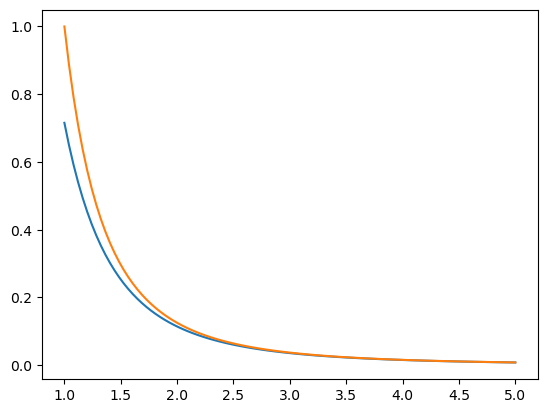

In [18]:
dipole_x = np.linspace(1,5,100)

exact_curve = [exact.subs({y: i}) for i in dipole_x]
approx_curve = [dipole.subs({q: 4*np.pi, π: np.pi, d: 1, ϵ0: 1, y: i}) for i in dipole_x]
plt.plot(dipole_x, exact_curve)
plt.plot(dipole_x, approx_curve)
plt.show()

You can see that the dipole approximation (orange) is not bad for $y=3$.

<h2>The Electric Field From Four Point Charges</h2>

The same code can be used to investigate more compliated charge configurations. Suppose we have four equal charges at the corners of a square of length d.

In [19]:
q3, q4 = sym.symbols('q3 q4')
four_charges = [[q1,[-d/2,d/2]],[q2,[d/2,d/2]],[q3, [-d/2,-d/2]], [q4,[d/2,-d/2]]]

/tmp/ipykernel_21760/697449044.py:22: RuntimeWarning: invalid value encountered in cast
  x_values = x_values.astype(float)
/tmp/ipykernel_21760/697449044.py:23: RuntimeWarning: invalid value encountered in cast
  y_values = y_values.astype(float)


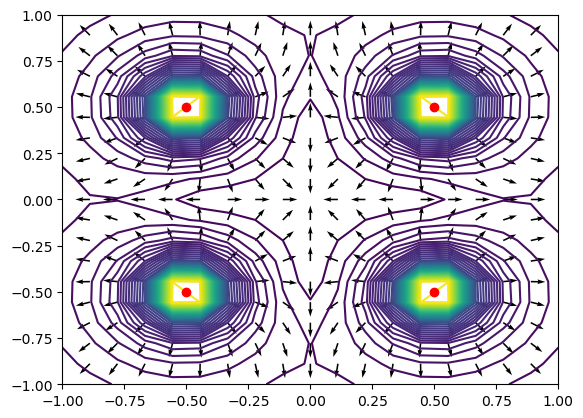

In [20]:
X = np.linspace(-1,1,19)
Y = np.linspace(-1,1,19)

xx, yy = np.meshgrid(X,Y)

(our_x, our_y) = TotalField(four_charges)

x_values = [our_x.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, x: i, y: j, ϵ0: 1}) for i in X for j in Y]
y_values = [our_y.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, x: i, y: j, ϵ0: 1}) for i in X for j in Y]

x_values = np.asarray(x_values)
y_values = np.asarray(y_values)

mag = [MagnitudeEfield(four_charges).subs({q1: 4*np.pi, q2: 4*np.pi, q3: 4*np.pi, q4: 4*np.pi, d: 1, π: np.pi, x: i, y: j, ϵ0: 1}) for i in X for j in Y]

mag = np.asarray(mag)
mag = np.asarray(mag)

x_values = x_values/mag
y_values = y_values/mag

x_values = x_values.astype(float)
y_values = y_values.astype(float)


Z = mag.reshape(len(X),len(Y)).astype(float)
cp = plt.contour(yy, xx, Z, 100)

quiv = plt.quiver(yy, xx, x_values, y_values)
plt.plot(-0.5,-0.5,marker="o",color="Red")
plt.plot(-0.5,0.5,marker="o",color="Red")
plt.plot(0.5,-0.5,marker="o",color="Red")
plt.plot(0.5,0.5,marker="o",color="Red")

plt.show()

<h2>An Electrostatic Trap?</h2>

Notice that the electric field in the center is zero. Can we use this to make an electrostatic trap?  The potential that a test charge near the origin would see is

In [21]:
Well = Potential(four_charges)
Well.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, ϵ0: 1})

1.0/((x - 1/2)**2 + (y - 1/2)**2)**0.5 + 1.0/((x - 1/2)**2 + (y + 1/2)**2)**0.5 + 1.0/((x + 1/2)**2 + (y - 1/2)**2)**0.5 + 1.0/((x + 1/2)**2 + (y + 1/2)**2)**0.5

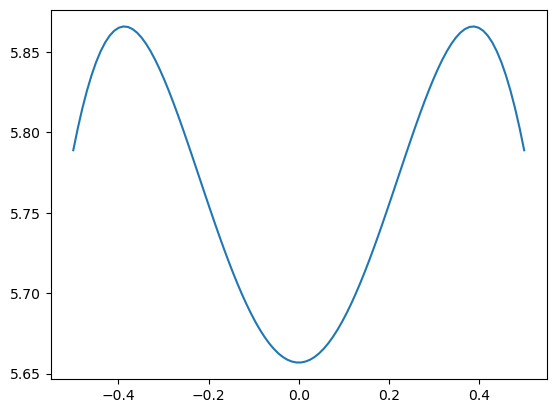

In [22]:
well_x = np.linspace(-0.5, 0.5, 100)
well_eval = [Well.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, x: i, y: 0, ϵ0: 1}) for i in well_x]

plt.plot(well_x,well_eval)
plt.show()

In two dimensions the potential near the center looks like:

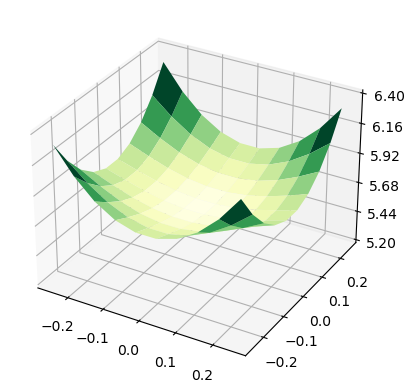

In [23]:
from matplotlib.ticker import LinearLocator

ax = plt.figure().add_subplot(projection='3d')

well_x_3d = np.linspace(-0.25, 0.25, 10)
well_y_3d = np.linspace(-0.25, 0.25, 10)

wx, wy = np.meshgrid(well_x_3d, well_y_3d)

well_eval_3d = [Well.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, x: i, y: j, ϵ0: 1}) for i in well_x_3d for j in well_y_3d]
well_eval_3d = np.asarray(well_eval_3d)
well_eval_3d = well_eval_3d.astype(float)
well_eval_3d = well_eval_3d.reshape(wx.shape)

surf = ax.plot_surface(wx, wy, well_eval_3d, cmap="YlGn", linewidth=0)

# Customize the z axis.
ax.set_zlim(5.2, 6.4)
ax.zaxis.set_major_locator(LinearLocator(6))

plt.show()


But globally it's much more complicated.

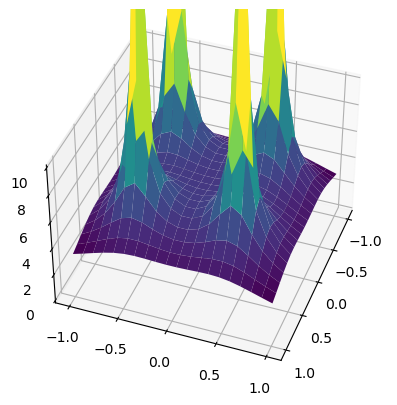

In [24]:
ax = plt.figure().add_subplot(projection='3d')

well_x_3d = np.linspace(-1, 1, 20)
well_y_3d = np.linspace(-1, 1, 20)

wx, wy = np.meshgrid(well_x_3d, well_y_3d)

well_eval_3d = [Well.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, x: i, y: j, ϵ0: 1}) for i in well_x_3d for j in well_y_3d]
well_eval_3d = np.asarray(well_eval_3d)
well_eval_3d = well_eval_3d.astype(float)
well_eval_3d = well_eval_3d.reshape(wx.shape)

surf = ax.plot_surface(wx, wy, well_eval_3d, cmap="viridis", linewidth=0)

# Customize the z axis.
ax.set_zlim(0, 10)
ax.zaxis.set_major_locator(LinearLocator(6))

#set the view
ax.view_init(elev=40, azim=20)

plt.show()

Note: you may change the values of view_init to rotate the mesh.

It looks like a nice stable well (at least near the center) and so it would appear that we have a nice electrostatic trap. But we don't and we can't.  You cannot make an electrostatic trap from fixed arrangement of charges. If the trapped charge is to be in equilibrium the electric field on it must be zero. However, if the equilibrium is to be stable, then all the lines of flux into a small sphere (Gaussian surface) surrounding the charge must flow inward toward the charge. But by Gauss' law if all the flux lines are inward the electric field cannot be zero. That is the general argument but how does our particular case fail? It fails because we have looked only at motion in the x-y plane. What about motion in the z plane (that is into or out of the computer screen). For motion in the z-plane our trap is not stable. As soon as the particle moves away from the z=0 plane it feels a positive electric field and is thus not in equilibrium.<br><br>
From looking at the potential we expect that if a test charge is near the center it should undergo simple harmonic motion but that if the excursions from the center are large enough the motion will be complicated. The force on a test charge is $q\textbf{E}$ so the force on a test charge in our four charge electric field is 

In [25]:
t = sym.symbols('t')
f_x = sym.Function("x")(t)
f_y = sym.Function("y")(t)
qE_x, qE_y = TotalField(four_charges)
qE_x = qE_x.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, ϵ0: 1, x: f_x, y: f_y})
qE_y = qE_y.subs({q1: 4*np.pi, q2: 4*np.pi, d: 1, q3: 4*np.pi, q4: 4*np.pi, π: np.pi, ϵ0: 1, x: f_x, y: f_y})

where we have made x and y functions of t by using subs. The equations of motion are

In [26]:
Xequation = sym.Derivative(qE_x, t, 2)
Yequation = sym.Derivative(qE_y, t, 2)
Xequation

Derivative(1.0*(x(t) - 1/2)/((x(t) - 1/2)**2 + (y(t) - 1/2)**2)**1.5 + 1.0*(x(t) - 1/2)/((x(t) - 1/2)**2 + (y(t) + 1/2)**2)**1.5 + 1.0*(x(t) + 1/2)/((x(t) + 1/2)**2 + (y(t) - 1/2)**2)**1.5 + 1.0*(x(t) + 1/2)/((x(t) + 1/2)**2 + (y(t) + 1/2)**2)**1.5, (t, 2))

These differential equations can not be solved exactly but we can solve them numerically. Sympy has a method called "solve" which solve a differential equation numerically. You will, at some point, learn how these numerical algorithms work for solving complicated differential equations. For now we will use it as a "black box" and not worry about how it works. 

In [27]:
initial_conditions = {
    f_x.subs(t, 0): 0,
    f_y.subs(t, 0): 0,
    f_x.diff(t).subs(t, 0): 0.1,
    f_y.diff(t).subs(t, 0): 0.1
}

solution = sym.dsolve([Xequation],[f_x], t=t, ics=initial_conditions, hint="all")
print(solution)

[]


<h2>Exercises</h2> The assignment for Week 16 is to complete the following problems.  <u>The submission should include your input code, the relevant outputs, and some sentences which explain the results.</u>  The code should be self-contained and should run "in order"; that is, I should be able to simply run your notebook from beginning to end in order to reproduce your outputs.
<h3>Problem One</h3>
Compute, plot and discuss the electric field due to eight charges arrange in two horizontal lines, each with four equally spaced charges. Take the charges in the top line as positive charges and the charges in the bottom line as negative charges. Take the charges all to have a charge magnitude of $|q| = 4 \pi \epsilon_0$. <br><br>
(The field produced by these charges appears to approximate the field created by oppositely charged parallel plates... a capacitor!)
<h3>Problem Two</h3>
Compute, plot and discuss the electric field due to six charges equally spaced around a ring of unit radius. Take the charges all to have charge $q = 4 \pi \epsilon_0$